Purpose: Find the optimal number of top features to pull from each model for core gene finding by looking at model performance under iterative feature selection.<br>
Author: Anna Pardo<br>
Date initiated: Mar. 21, 2024

In [1]:
# import modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set top-level directory
d = "../../data/RF_IFS/"

In [4]:
# load into dictionaries
psyndict = {}
alldict = {}
for f in os.listdir(d):
    if "Leaf" in f:
        s = f.split("_L")[0]
        psyndict[s] = pd.read_csv(os.path.join(d,f),sep="\t",header="infer")
    elif "All" in f:
        s = f.split("_A")[0]
        alldict[s] = pd.read_csv(os.path.join(d,f),sep="\t",header="infer")

In [5]:
alldict["Low_Nitrogen"].head()

,n_features,accuracy,AUC,F1_class0,F1_class1
0,5,0.489933,0.554434,0.449275,0.525000
1,10,0.523490,0.572639,0.449612,0.579882
2,25,0.536913,0.574441,0.448000,0.601156
3,50,0.530201,0.572459,0.396552,0.615385
4,100,0.550336,0.563446,0.436975,0.625698


<AxesSubplot: xlabel='n_features', ylabel='accuracy'>

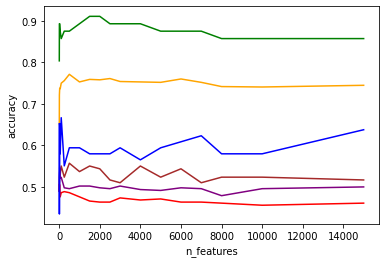

In [15]:
sns.lineplot(data=alldict["Low_Nitrogen"],x="n_features",y="accuracy",color="brown")
sns.lineplot(data=alldict["Drought"],x="n_features",y="accuracy",color="orange")
sns.lineplot(data=alldict["Cold"],x="n_features",y="accuracy",color="purple")
sns.lineplot(data=alldict["Heat"],x="n_features",y="accuracy",color="red")
sns.lineplot(data=alldict["Flooding"],x="n_features",y="accuracy",color="blue")
sns.lineplot(data=alldict["Salt"],x="n_features",y="accuracy",color="green")

<AxesSubplot: xlabel='n_features', ylabel='accuracy'>

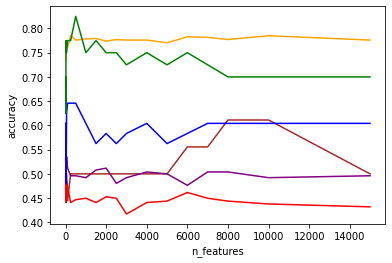

In [16]:
sns.lineplot(data=psyndict["Low_Nitrogen"],x="n_features",y="accuracy",color="brown")
sns.lineplot(data=psyndict["Drought"],x="n_features",y="accuracy",color="orange")
sns.lineplot(data=psyndict["Cold"],x="n_features",y="accuracy",color="purple")
sns.lineplot(data=psyndict["Heat"],x="n_features",y="accuracy",color="red")
sns.lineplot(data=psyndict["Flooding"],x="n_features",y="accuracy",color="blue")
sns.lineplot(data=psyndict["Salt"],x="n_features",y="accuracy",color="green")

In [53]:
# make a function to pull out a dataframe for a given model performance metric in a given dictionary

def pmetdf(pmet,dictionary):
    dflist = []
    for k,v in dictionary.items():
        df = v[["n_features",pmet]]
        df[k] = df[pmet]
        dflist.append(df[["n_features",k]].set_index("n_features"))
    outdf = pd.concat(dflist,axis=1)
    outdf["Mean "+pmet] = outdf.mean(axis=1)
    return outdf.reset_index()

In [54]:
metrics = ["accuracy","AUC","F1_class0","F1_class1"]

In [55]:
mdall = {}
for m in metrics:
    mdall[m] = pmetdf(m,alldict)

/tmp/ipykernel_31439/862769725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k] = df[pmet]
/tmp/ipykernel_31439/862769725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k] = df[pmet]
/tmp/ipykernel_31439/862769725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [40]:
mdpsyn = {}
for m in metrics:
    mdpsyn[m] = pmetdf(m,psyndict)

/tmp/ipykernel_31439/862769725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k] = df[pmet]
/tmp/ipykernel_31439/862769725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k] = df[pmet]
/tmp/ipykernel_31439/862769725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

Text(0.5, 0.98, 'Performance metric evaluation: all tissues')

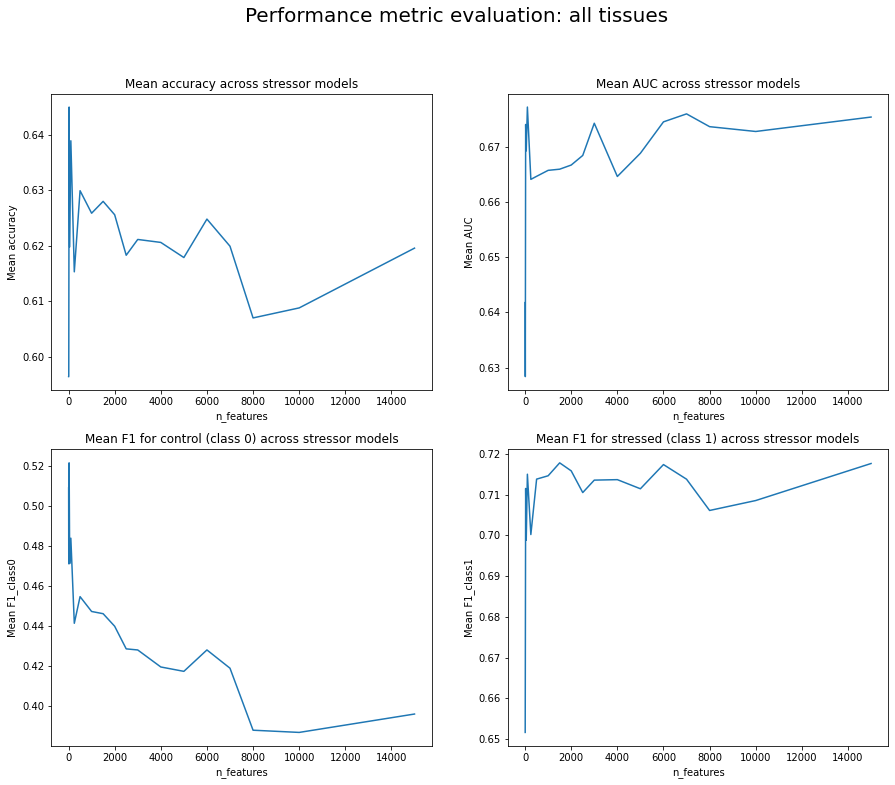

In [65]:
# make plots
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
a=sns.lineplot(ax=ax[0,0],data=mdall["accuracy"],x="n_features",y="Mean accuracy")
a.set_title("Mean accuracy across stressor models")
b=sns.lineplot(ax=ax[0,1],data=mdall["AUC"],x="n_features",y="Mean AUC")
b.set_title("Mean AUC across stressor models")
c=sns.lineplot(ax=ax[1,0],data=mdall["F1_class0"],x="n_features",y="Mean F1_class0")
c.set_title("Mean F1 for control (class 0) across stressor models")
d=sns.lineplot(ax=ax[1,1],data=mdall["F1_class1"],x="n_features",y="Mean F1_class1")
d.set_title("Mean F1 for stressed (class 1) across stressor models")

plt.suptitle("Performance metric evaluation: all tissues",fontsize=20)

Text(0.5, 0.98, 'Performance metric evaluation: photosynthetic tissues')

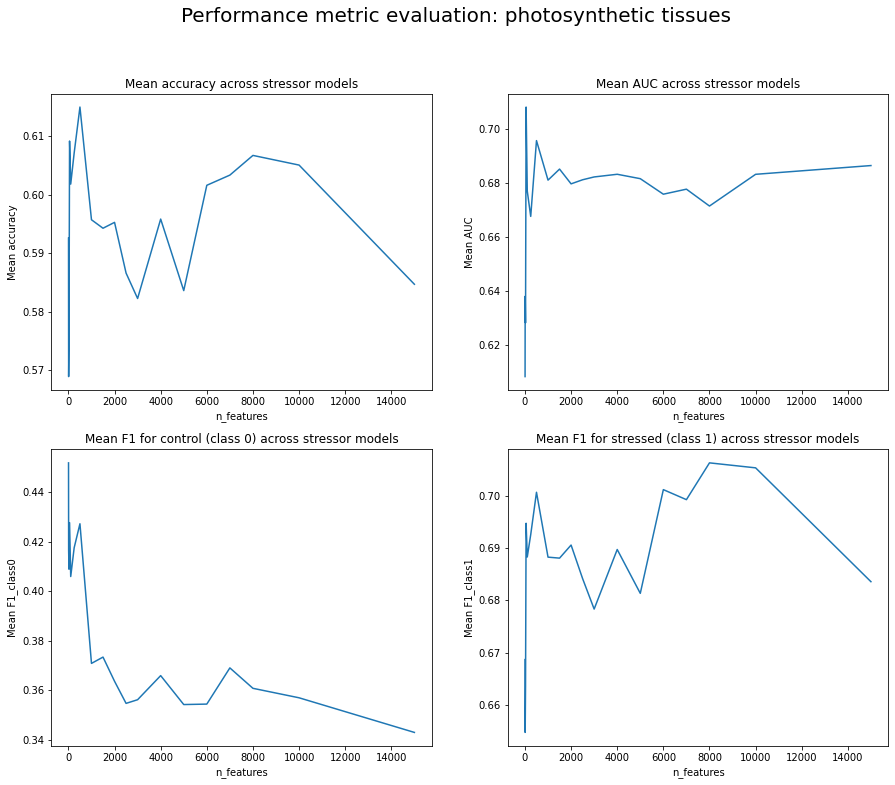

In [66]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
a=sns.lineplot(ax=ax[0,0],data=mdpsyn["accuracy"],x="n_features",y="Mean accuracy")
a.set_title("Mean accuracy across stressor models")
b=sns.lineplot(ax=ax[0,1],data=mdpsyn["AUC"],x="n_features",y="Mean AUC")
b.set_title("Mean AUC across stressor models")
c=sns.lineplot(ax=ax[1,0],data=mdpsyn["F1_class0"],x="n_features",y="Mean F1_class0")
c.set_title("Mean F1 for control (class 0) across stressor models")
d=sns.lineplot(ax=ax[1,1],data=mdpsyn["F1_class1"],x="n_features",y="Mean F1_class1")
d.set_title("Mean F1 for stressed (class 1) across stressor models")

plt.suptitle("Performance metric evaluation: photosynthetic tissues",fontsize=20)

Based on these graphs, particularly AUC and F1 class 1, I will take the top 6000 features for the core stress genes.